In [1]:
import pandas as pd
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Dtype of RiskLevel is object. we need to change it to numeric(encoding). Dtype of the other Data does't need any changes.

In [3]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [4]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

df['RiskLevel'] = labelencoder.fit_transform(df['RiskLevel'])

In [5]:
df['RiskLevel'].value_counts()

1    406
2    336
0    272
Name: RiskLevel, dtype: int64

In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.063116
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.772146
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


if we don't normalize, some models like KNN won't predict well

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df.iloc[:, :-1])
df.iloc[:, :-1] = pd.DataFrame(X_train_minmax)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,0.331197,0.479980,0.538442,0.209691,0.133018,0.810865,1.063116
std,0.224573,0.204488,0.272271,0.253349,0.274277,0.097454,0.772146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.333333,0.313725,0.069231,0.000000,0.759036,0.000000
50%,0.266667,0.555556,0.607843,0.115385,0.000000,0.831325,1.000000
75%,0.483333,0.555556,0.803922,0.153846,0.000000,0.879518,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [10]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

there are no missing values

In [11]:
df.shape

(1014, 7)

if we drop duplicates the accuracy decreases on every models.

In [12]:
# df = df.drop_duplicates()

In [15]:
# df.shape

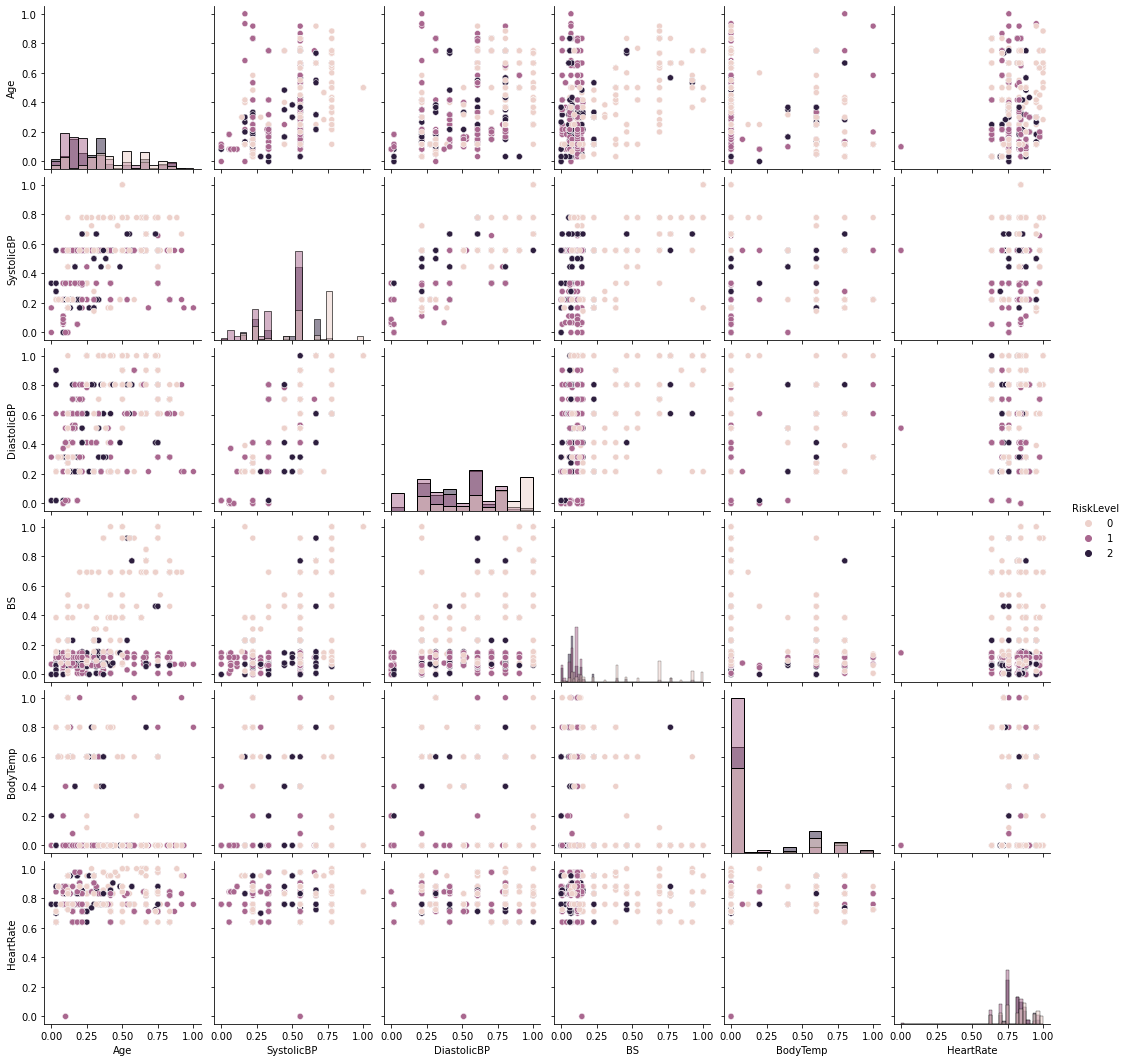

In [16]:
import seaborn as sns

sns.pairplot(df,hue="RiskLevel", diag_kind="hist")

In [17]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,-0.211851
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,-0.208797
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,-0.284633
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,-0.479958
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,-0.006680
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,-0.111637
RiskLevel,-0.211851,-0.208797,-0.284633,-0.479958,-0.006680,-0.111637,1.000000


**preprocessing finished**

shffle:

frac=1 means to return all rows (in random order)

In [18]:
df = df.sample(frac=1)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
135,0.200000,0.222222,0.215686,0.115385,0.8,0.638554,0
659,0.433333,0.555556,0.803922,0.076923,0.0,0.903614,2
137,0.750000,0.777778,0.901961,1.000000,0.0,0.843373,0
412,0.750000,0.555556,0.803922,0.061538,0.0,0.855422,1
476,0.083333,0.066667,0.000000,0.146154,0.0,0.843373,1
...,...,...,...,...,...,...,...
159,0.250000,0.333333,0.803922,0.115385,0.0,0.831325,1
178,0.500000,0.555556,0.901961,0.384615,0.0,0.879518,0
731,0.633333,0.555556,0.607843,0.384615,0.0,0.975904,2
62,0.033333,0.277778,0.215686,0.092308,0.0,0.843373,1


split RiskLevel:

In [19]:
y = df["RiskLevel"]
X =df.iloc[:, :-1]

In [20]:
y.head()

135    0
659    2
137    0
412    1
476    1
Name: RiskLevel, dtype: int64

In [21]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
135,0.200000,0.222222,0.215686,0.115385,0.8,0.638554
659,0.433333,0.555556,0.803922,0.076923,0.0,0.903614
137,0.750000,0.777778,0.901961,1.000000,0.0,0.843373
412,0.750000,0.555556,0.803922,0.061538,0.0,0.855422
476,0.083333,0.066667,0.000000,0.146154,0.0,0.843373


split train and test (70-30)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
118,0.366667,0.777778,1.000000,0.146154,0.0,0.855422
783,0.033333,0.555556,0.901961,0.061538,0.0,0.638554
521,0.216667,0.555556,0.803922,0.115385,0.0,0.759036
296,0.366667,0.555556,0.803922,0.130769,0.0,0.759036
919,0.150000,0.222222,0.411765,0.115385,0.0,0.879518
...,...,...,...,...,...,...
666,0.183333,0.222222,0.019608,0.038462,0.0,0.638554
794,0.333333,0.555556,0.607843,0.061538,0.0,0.759036
292,0.350000,0.555556,0.215686,0.007692,0.0,0.831325
504,0.333333,0.555556,0.607843,0.146154,0.6,0.831325


In [24]:
X_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
400,0.200000,0.333333,0.313725,0.138462,0.0,0.879518
310,0.750000,0.555556,0.803922,0.069231,0.0,0.831325
879,0.216667,0.322222,0.215686,0.061538,0.0,0.831325
372,0.833333,0.555556,0.705882,0.692308,0.0,0.638554
728,0.166667,0.444444,0.215686,0.076923,0.4,0.759036
...,...,...,...,...,...,...
561,0.050000,0.222222,0.313725,0.115385,0.6,0.879518
274,0.500000,0.555556,0.901961,0.384615,0.0,0.879518
893,0.083333,0.066667,0.000000,0.146154,0.0,0.843373
616,0.366667,0.555556,0.607843,0.115385,0.0,0.759036


In [25]:
y_train

118    0
783    2
521    1
296    1
919    1
      ..
666    1
794    2
292    1
504    0
10     1
Name: RiskLevel, Length: 709, dtype: int64

In [26]:
y_test

400    1
310    1
879    1
372    2
728    2
      ..
561    1
274    0
893    1
616    1
388    1
Name: RiskLevel, Length: 305, dtype: int64

In [27]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits = 10, random_state=0)      #10 fold cross validation

In [28]:
def k_fold_score(clf, cv) :
    score = cross_val_score(clf, X_train, y_train, cv=cv).mean()*100
    print('score using 10-fold cross validation:', score,'%')

In [29]:
from sklearn.metrics import accuracy_score

def test_accuracy(decision) :
    decision.fit(X_train, y_train)
    predY = decision.predict(X_test)
    return accuracy_score(y_true=y_test, y_pred=predY)*100

def train_accuracy(decision) :
    decision.fit(X_train, y_train)
    predY = decision.predict(X_train)
    return accuracy_score(y_true=y_train, y_pred=predY)*100

In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(decision) :
    decision.fit(X_train, y_train)
    predY = decision.predict(X_test)
    cf_matrix = confusion_matrix(y_test, predY)
    sns.heatmap(cf_matrix, annot=True)

**decision tree**:

In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier() 
k_fold_score(clf, cv)

clf = tree.DecisionTreeClassifier(criterion = 'entropy')  #default: gini
k_fold_score(clf, cv)

clf = tree.DecisionTreeClassifier(splitter= 'random')     #default: best
k_fold_score(clf, cv)


clf = tree.DecisionTreeClassifier(max_features = 'log2')    # {“auto”, “sqrt”, “log2”}, default=None  
                                                            # max_features = auto ~ 2.4
                                                            # max_features = sqrt ~ 2.4
                                                            # max_features = log2 ~ 2.5
                                                            # max_features = None ~ 6
k_fold_score(clf, cv)



clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'random')
k_fold_score(clf, cv)

clf = tree.DecisionTreeClassifier(                       splitter= 'random' ,max_features = 'log2')
k_fold_score(clf, cv)

clf = tree.DecisionTreeClassifier(criterion = 'entropy'                    ,max_features = 'log2')
k_fold_score(clf, cv)


clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'random', max_features = 'log2')
k_fold_score(clf, cv)


clf = tree.DecisionTreeClassifier(class_weight={ 0: 0})      # low risk, mid risk, high risk
k_fold_score(clf, cv)


clf = tree.DecisionTreeClassifier(class_weight={ 1: 0})      #the most important
k_fold_score(clf, cv)


clf = tree.DecisionTreeClassifier(class_weight={ 2: 0})
k_fold_score(clf, cv)

score using 10-fold cross validation: 81.40845070422536 %
score using 10-fold cross validation: 82.53521126760563 %
score using 10-fold cross validation: 81.97183098591549 %
score using 10-fold cross validation: 81.97183098591549 %
score using 10-fold cross validation: 80.98591549295774 %
score using 10-fold cross validation: 79.1549295774648 %
score using 10-fold cross validation: 81.26760563380282 %
score using 10-fold cross validation: 79.85915492957746 %
score using 10-fold cross validation: 58.16901408450704 %
score using 10-fold cross validation: 53.80281690140845 %
score using 10-fold cross validation: 64.08450704225352 %


We don't focus on *max_depth* because time isn't important

It's clear that the best value for *min_samples_split* is 2. it can't be less than 2 and if it is greater than 2 it works faster but less score

*min_samples_leaf*, *max_leaf_nodes*: it can decrease time and complexity and overfit. but we use k-fold cross value So we know it doesn't overfit


there are not many differences between using auto, sqrt, and log2 for *max_features*. So I just compared *sqrt* and *default* value



now.. the best set of parameters is below:

In [32]:
clf = tree.DecisionTreeClassifier(max_features = 'log2')
k_fold_score(clf, cv)

print("test accuracy-decision tree:" ,test_accuracy(clf))
print("train accuracy-decision tree:" ,train_accuracy(clf))
print()


clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'random')
k_fold_score(clf, cv)

print("test accuracy-decision tree:" ,test_accuracy(clf))
print("train accuracy-decision tree:" ,train_accuracy(clf))
print()


clf = tree.DecisionTreeClassifier(criterion = 'entropy'                    ,max_features = 'log2')
k_fold_score(clf, cv)

print("test accuracy-decision tree:" ,test_accuracy(clf))
print("train accuracy-decision tree:" ,train_accuracy(clf))
print()

clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'random', max_features = 'log2')
k_fold_score(clf, cv)

print("test accuracy-decision tree:" ,test_accuracy(clf))
print("train accuracy-decision tree:" ,train_accuracy(clf))
print()

score using 10-fold cross validation: 81.40845070422536 %
test accuracy-decision tree: 81.63934426229508
train accuracy-decision tree: 93.51198871650212

score using 10-fold cross validation: 81.26760563380282 %
test accuracy-decision tree: 80.0
train accuracy-decision tree: 93.51198871650212

score using 10-fold cross validation: 80.70422535211267 %
test accuracy-decision tree: 79.34426229508198
train accuracy-decision tree: 93.51198871650212

score using 10-fold cross validation: 80.56338028169014 %
test accuracy-decision tree: 81.9672131147541
train accuracy-decision tree: 93.51198871650212



score using 10-fold cross validation: 80.42253521126761 %
test accuracy-decision tree: 82.29508196721311
train accuracy-decision tree: 93.51198871650212


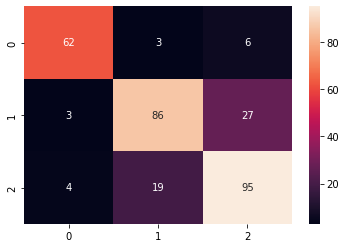

In [33]:

clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'random', max_features = 'log2')
k_fold_score(clf, cv)

print("test accuracy-decision tree:" ,test_accuracy(clf))
print("train accuracy-decision tree:" ,train_accuracy(clf))

plot_confusion_matrix(clf)

score using 10-fold cross validation: 81.26760563380282 %
test accuracy-decision tree: 82.62295081967214
train accuracy-decision tree: 93.51198871650212


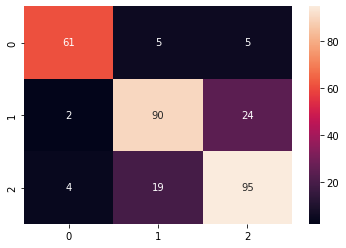

In [34]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy'                    ,max_features = 'log2')
k_fold_score(clf, cv)

print("test accuracy-decision tree:" ,test_accuracy(clf))
print("train accuracy-decision tree:" ,train_accuracy(clf))

plot_confusion_matrix(clf)

**KNN:**

In [35]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier()
k_fold_score(neigh, cv)

neigh = KNeighborsClassifier(2)
k_fold_score(neigh, cv)

neigh = KNeighborsClassifier(weights='distance')          #default: uniform
k_fold_score(neigh, cv)

neigh = KNeighborsClassifier(algorithm = 'ball_tree')     #default:auto
k_fold_score(neigh, cv)
# Leaf size passed to BallTree or KDTree.


neigh = KNeighborsClassifier(algorithm= 'kd_tree')
k_fold_score(neigh, cv)


neigh = KNeighborsClassifier(algorithm='brute')
k_fold_score(neigh, cv)


neigh = KNeighborsClassifier(n_neighbors=1)
k_fold_score(neigh, cv)

neigh = KNeighborsClassifier(p=1,n_neighbors=1)           #default:2     
k_fold_score(neigh, cv)


score using 10-fold cross validation: 67.32394366197182 %
score using 10-fold cross validation: 75.07042253521125 %
score using 10-fold cross validation: 79.5774647887324 %
score using 10-fold cross validation: 67.1830985915493 %
score using 10-fold cross validation: 67.32394366197182 %
score using 10-fold cross validation: 67.04225352112675 %
score using 10-fold cross validation: 78.87323943661973 %
score using 10-fold cross validation: 79.43661971830987 %


In [36]:
neigh = KNeighborsClassifier(n_neighbors=1)
k_fold_score(neigh, cv)

print(test_accuracy(neigh))
print(train_accuracy(neigh))
print()


neigh = KNeighborsClassifier(weights='distance')
k_fold_score(neigh, cv)

print(test_accuracy(neigh))
print(train_accuracy(neigh))
print()

neigh = KNeighborsClassifier(p=1,n_neighbors=1)           #default:2     
k_fold_score(neigh, cv)

print(test_accuracy(neigh))
print(train_accuracy(neigh))
print()

score using 10-fold cross validation: 78.87323943661973 %
80.98360655737706
91.8194640338505

score using 10-fold cross validation: 79.5774647887324 %
78.0327868852459
93.22990126939351

score using 10-fold cross validation: 79.43661971830987 %
81.31147540983606
91.8194640338505



the first one and last one seem better. the middle one seems to overfit(up)

score using 10-fold cross validation: 79.43661971830987 %
81.31147540983606
91.8194640338505



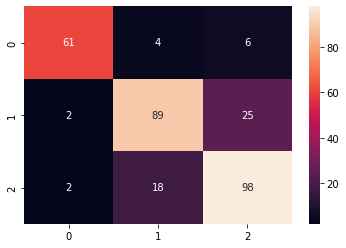

In [37]:
neigh = KNeighborsClassifier(p=1,n_neighbors=1)           #default:2     
k_fold_score(neigh, cv)

print(test_accuracy(neigh))
print(train_accuracy(neigh))
print()
plot_confusion_matrix(neigh)

**SVC**

In [38]:
from sklearn.svm import SVC

clf = SVC()
k_fold_score(clf, cv)


clf = SVC(C=10)    #default=1
k_fold_score(clf, cv)

clf = SVC(C=13)
k_fold_score(clf, cv)

clf = SVC(C=15)
k_fold_score(clf, cv)

clf = SVC(gamma=1)
k_fold_score(clf, cv)

clf = SVC(C=13, gamma=1)
k_fold_score(clf, cv)

clf = SVC(coef0=-0.2)    #default=0
k_fold_score(clf, cv)

clf = SVC(coef0=0.2)
k_fold_score(clf, cv)

clf = SVC(coef0=1)
k_fold_score(clf, cv)

clf = SVC(kernel="linear")
k_fold_score(clf, cv)


clf = SVC(kernel="sigmoid")
k_fold_score(clf, cv)


clf = SVC(kernel="linear",C=13)
k_fold_score(clf, cv)


clf = SVC(kernel="sigmoid",C=13, coef0=0.20)
k_fold_score(clf, cv)

score using 10-fold cross validation: 63.94366197183098 %
score using 10-fold cross validation: 66.90140845070422 %
score using 10-fold cross validation: 66.7605633802817 %
score using 10-fold cross validation: 66.61971830985915 %
score using 10-fold cross validation: 63.802816901408455 %
score using 10-fold cross validation: 67.04225352112675 %
score using 10-fold cross validation: 63.94366197183098 %
score using 10-fold cross validation: 63.94366197183098 %
score using 10-fold cross validation: 63.94366197183098 %
score using 10-fold cross validation: 57.60563380281691 %
score using 10-fold cross validation: 23.38028169014085 %
score using 10-fold cross validation: 60.0 %
score using 10-fold cross validation: 26.76056338028169 %


score using 10-fold cross validation: 66.7605633802817 %
74.42622950819671
72.63751763046544


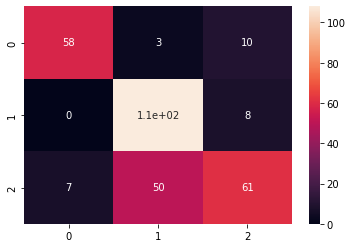

In [39]:
clf = SVC(C=13)
k_fold_score(clf, cv)
print(test_accuracy(clf))
print(train_accuracy(clf))

plot_confusion_matrix(clf)

**random forest:**

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
k_fold_score(clf, cv)

clf = RandomForestClassifier(n_estimators=500)  #default : 100
k_fold_score(clf, cv)

clf = RandomForestClassifier(criterion='entropy') #default:”gini”
k_fold_score(clf, cv)

clf = RandomForestClassifier(max_features=None)  #max_features{“auto”, “sqrt”, “log2”} default=”auto”
k_fold_score(clf, cv)

clf = RandomForestClassifier(max_features= 'log2')
k_fold_score(clf, cv)

clf = RandomForestClassifier(bootstrap= False)
k_fold_score(clf, cv)


clf = RandomForestClassifier(oob_score= True)#Only available if bootstrap=True.
k_fold_score(clf, cv)


clf = RandomForestClassifier(warm_start=True)
k_fold_score(clf, cv)
 
clf = RandomForestClassifier(warm_start='balanced')#default=None
k_fold_score(clf, cv)

clf = RandomForestClassifier(ccp_alpha=0.01)    #default=0.0
k_fold_score(clf, cv)

clf = RandomForestClassifier(warm_start= 'balanced_subsample')
k_fold_score(clf, cv)


clf = RandomForestClassifier(n_estimators=500,max_features= 'log2', warm_start=True      , oob_score= True)
k_fold_score(clf, cv)

clf = RandomForestClassifier(n_estimators=500,max_features= 'log2', warm_start='balanced', oob_score= True)
k_fold_score(clf, cv)

score using 10-fold cross validation: 82.3943661971831 %
score using 10-fold cross validation: 82.67605633802816 %
score using 10-fold cross validation: 83.09859154929576 %
score using 10-fold cross validation: 83.09859154929578 %
score using 10-fold cross validation: 81.97183098591549 %
score using 10-fold cross validation: 82.25352112676056 %
score using 10-fold cross validation: 81.97183098591549 %
score using 10-fold cross validation: 82.11267605633802 %
score using 10-fold cross validation: 81.69014084507043 %
score using 10-fold cross validation: 70.4225352112676 %
score using 10-fold cross validation: 82.25352112676056 %
score using 10-fold cross validation: 81.97183098591549 %
score using 10-fold cross validation: 82.53521126760563 %


score using 10-fold cross validation: 82.11267605633802 %
82.95081967213115
93.51198871650212



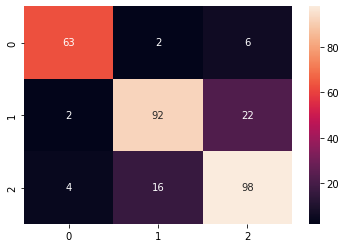

In [41]:
clf = RandomForestClassifier(n_estimators=500)  
k_fold_score(clf, cv)
print(test_accuracy(clf))
print(train_accuracy(clf))
print()
plot_confusion_matrix(clf)